In [20]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [9]:
from xgboost import XGBRegressor
from xgboost import plot_importance

In [3]:
df_final = pd.read_csv('/Users/Daniyar/Mountains/Data/df_final.csv', index_col='time')

In [4]:
X = df_final.drop(columns=['generation solar','generation wind onshore'])
y_solar = df_final['generation solar']
y_wind = df_final['generation wind onshore']

In [5]:
def split_by_date(X,train_end_date):
    if not isinstance(train_end_date, pd.Timestamp):
        train_end_date = pd.Timestamp(train_end_date)

    # Convert index of X and y to Timestamp objects if they are strings
    if isinstance(X.index[0], str):
        X.index = pd.to_datetime(X.index)
        
    X_train = X[X.index <= train_end_date]
    X_test = X[X.index > train_end_date]
    
    return X_train, X_test

train_end_date = pd.to_datetime('2017-12-31 23:00:00+00:00')
X_train, X_test = split_by_date(X,train_end_date)


In [6]:
y_solar_train, y_solar_test = split_by_date(y_solar, train_end_date)
y_wind_train, y_wind_test = split_by_date(y_wind, train_end_date)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Initialize and train the XGBoost classifier
xgb = XGBRegressor(n_estimators=1000, max_depth=5, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(X_train_scaled, y_solar_train, eval_metric="rmse")

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [17]:
predictions = xgb.predict(X_test_scaled)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

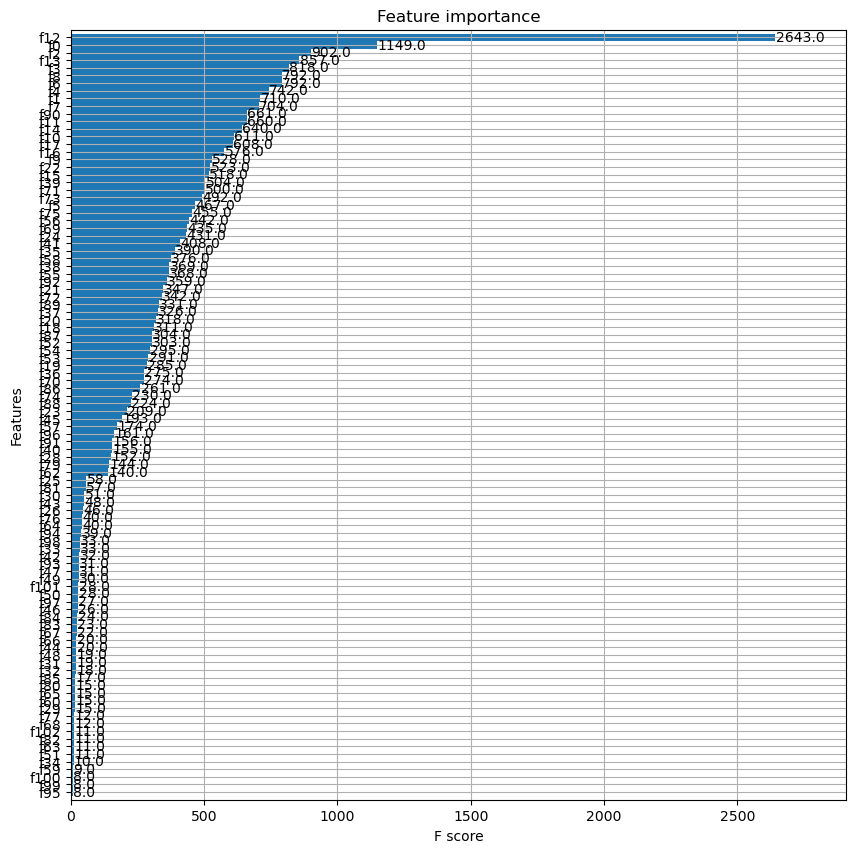

In [18]:
figsize=(10,10)
fig, ax = plt.subplots(1,1,figsize=figsize)
plot_importance(xgb, ax=ax,height = 1)

In [21]:
mse_solar = mean_squared_error(y_solar_test, predictions)

In [22]:
print(mse_solar)

51654.48317333199
